In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from collections import defaultdict
import math
import matplotlib.pyplot as plt

In [2]:
#kuzmin_2020_data_dir = "/Users/bjarnold/Princeton_DataX/Epistasis/yeast_screens/KuzminEtAl2020"
#kuzmin_2020_s1 = pd.read_csv(f"{kuzmin_2020_data_dir}/aaz5667-Table-S1.txt", sep="\t")
#kuzmin_2020_s1
#kuzmin_2020_s1['Combined mutant type'].value_counts()
#sns.histplot(kuzmin_2020_s1[kuzmin_2020_s1['Combined mutant type'] == 'trigenic']['Adjusted genetic interaction score (epsilon or tau)'])

#sns.histplot(kuzmin_s1[kuzmin_s1["combined_mutant_type"] == "trigenic"].adjusted_interaction_score_epsilon_or_tau)

In [3]:
# load in Kuzmin et al data
kuzmin_et_al_data_dir = "/Users/bjarnold/Princeton_DataX/Epistasis/higher_order_reanalysis/yeast_screens/KuzminEtAl2018/data_files"
kuzmin_s1 = pd.read_csv(f"{kuzmin_et_al_data_dir}/Data File S1_Raw genetic interaction dataset.tsv", sep="\t")
kuzmin_s2 = pd.read_csv(f"{kuzmin_et_al_data_dir}/Data File S2_Digenic and adjusted trigenic interaction dataset OpenedExportedFromExcel.txt", sep="\t")

kuzmin_s1 = kuzmin_s1.rename(columns = {"Query strain ID" : "query_strain_id",
                        "Query allele name": "query_allele_name",
                        "Array strain ID": "array_strain_id",
                        "Array allele name": "array_allele_name",
                        "Combined mutant type": "combined_mutant_type",
                        "Raw genetic interaction score (epsilon)": "raw_interaction_score_epsilon",
                        "Adjusted genetic interaction score (epsilon or tau)": "adjusted_interaction_score_epsilon_or_tau",
                        "P-value": "pval",
                        "Query single/double mutant fitness": "query_single_double_mutant_fitness",
                        "Array single mutant fitness": "array_single_mutant_fitness",
                        "Combined mutant fitness": "combined_mutant_fitness",
                        "Combined mutant fitness standard deviation": "combined_mutant_fitness_std"})

kuzmin_s1 = kuzmin_s1[["query_allele_name", 
                        "array_allele_name", 
                        "combined_mutant_type", 
                        "raw_interaction_score_epsilon", 
                        "adjusted_interaction_score_epsilon_or_tau", 
                        "pval", 
                        "query_single_double_mutant_fitness", 
                        "array_single_mutant_fitness", 
                        "combined_mutant_fitness"]]


significant_trigenic = {}
significant_digenic = {}
significant_digenic_negative = {}

for i,row in kuzmin_s2.iterrows():
    query_alleles = row['Query allele name'].split('+')
    array_allele = row['Array allele name']
    alleles = query_alleles + [array_allele]
    x = [ a.replace("_", "Δ") for a in alleles]
    if row['Combined mutant type'] == "trigenic":
        significant_trigenic[tuple(x)] = 1
    if row['Combined mutant type'] == "digenic":
        # assuming the second allele in the query dbl mutant is always ho_delta, the neutral mutation
        significant_digenic[tuple([x[0], x[2]])] = 1
        if row['Adjusted genetic interaction score (epsilon or tau)'] < 0:
            significant_digenic_negative[tuple([x[0], x[2]])] = 1


#print(significant_trigenic[0:5])
print("They report 3196 significant negative trigenic interactions, I find: ", len(significant_trigenic))
print("They report 9363 significant negative digenic interactions, I find: ", len(significant_digenic_negative), "but there are a total of", len(significant_digenic), "significant" )

significant = []
three_alleles = []
for i,row in kuzmin_s1.iterrows():
    alleles = tuple(row['query_allele_name'].split('+') + [row['array_allele_name']])
    three_alleles.append(",".join(list(alleles)))
    if row["combined_mutant_type"] == "trigenic":
        
        if alleles in significant_trigenic:
            significant.append(True)
        else:
            significant.append(False)
    else:
        significant.append(False)
    """
    elif row["combined_mutant_type"] == "digenic":
        alleles = tuple([row['query_allele_name'].split('+')[0]] + [row['array_allele_name']])
        if alleles in significant_digenic:
            significant.append(True)
        else:
            significant.append(False)
    """

    

kuzmin_s1["reported_significant_trigenic"] = significant
kuzmin_s1["three_alleles"] = three_alleles

print(np.sum(np.array(kuzmin_s1["reported_significant_trigenic"] )))
kuzmin_s1_trigenic = kuzmin_s1[kuzmin_s1["combined_mutant_type"] == "trigenic"]
#kuzmin_s1

They report 3196 significant negative trigenic interactions, I find:  3196
They report 9363 significant negative digenic interactions, I find:  6026 but there are a total of 9059 significant
3196


In [4]:
kuzmin_s1_trigenic


,query_allele_name,array_allele_name,combined_mutant_type,raw_interaction_score_epsilon,adjusted_interaction_score_epsilon_or_tau,pval,query_single_double_mutant_fitness,array_single_mutant_fitness,combined_mutant_fitness,reported_significant_trigenic,three_alleles
1169,nup60Δ+pml39Δ,acs1Δ,trigenic,0.022001,-0.033056,0.393700,0.5128,0.9875,0.5284,False,"nup60Δ,pml39Δ,acs1Δ"
1170,nup60Δ+pml39Δ,pex22Δ,trigenic,0.047924,-0.010328,0.266100,0.5128,0.8713,0.4947,False,"nup60Δ,pml39Δ,pex22Δ"
1171,nup60Δ+pml39Δ,sla1Δ,trigenic,0.087312,-0.055782,0.088980,0.5128,0.8230,0.5093,False,"nup60Δ,pml39Δ,sla1Δ"
1172,nup60Δ+pml39Δ,hir1Δ,trigenic,-0.030342,-0.017200,0.376300,0.5128,0.9370,0.4501,False,"nup60Δ,pml39Δ,hir1Δ"
1173,nup60Δ+pml39Δ,hap3Δ,trigenic,-0.034534,-0.069190,0.372200,0.5128,0.8615,0.4072,False,"nup60Δ,pml39Δ,hap3Δ"
...,...,...,...,...,...,...,...,...,...,...,...
501505,ski3Δ+ski8Δ,rpl43aΔ,trigenic,-0.064435,-0.023764,0.324700,0.9196,0.4963,0.3920,False,"ski3Δ,ski8Δ,rpl43aΔ"
501506,ski3Δ+ski8Δ,mcm16Δ,trigenic,0.039255,-0.076493,0.292400,0.9196,1.0125,0.9704,False,"ski3Δ,ski8Δ,mcm16Δ"
501507,ski3Δ+ski8Δ,brr1Δ,trigenic,0.126958,-0.000058,0.000003,0.9196,0.7907,0.8541,False,"ski3Δ,ski8Δ,brr1Δ"
501508,ski3Δ+ski8Δ,rox1Δ,trigenic,-0.184603,-0.152884,0.103600,0.9196,0.9890,0.7249,False,"ski3Δ,ski8Δ,rox1Δ"


In [5]:
kuzmin_s1[(kuzmin_s1["combined_mutant_type"] == "trigenic") & (kuzmin_s1["reported_significant_trigenic"] == True) ]

,query_allele_name,array_allele_name,combined_mutant_type,raw_interaction_score_epsilon,adjusted_interaction_score_epsilon_or_tau,pval,query_single_double_mutant_fitness,array_single_mutant_fitness,combined_mutant_fitness,reported_significant_trigenic,three_alleles
1182,nup60Δ+pml39Δ,pkc1-2,trigenic,0.076617,-0.207204,0.019860,0.5128,0.6626,0.4164,True,"nup60Δ,pml39Δ,pkc1-2"
1191,nup60Δ+pml39Δ,ubc4Δ,trigenic,-0.346976,-0.260351,0.000659,0.5128,0.8940,0.1114,True,"nup60Δ,pml39Δ,ubc4Δ"
1199,nup60Δ+pml39Δ,cmd1-3,trigenic,-0.169083,-0.080316,0.001384,0.5128,0.7660,0.2237,True,"nup60Δ,pml39Δ,cmd1-3"
1209,nup60Δ+pml39Δ,msi1Δ,trigenic,-0.180275,-0.169122,0.022990,0.5128,0.9470,0.3053,True,"nup60Δ,pml39Δ,msi1Δ"
1230,nup60Δ+pml39Δ,mrc1Δ,trigenic,-0.204560,-0.195387,0.008953,0.5128,0.8800,0.2467,True,"nup60Δ,pml39Δ,mrc1Δ"
...,...,...,...,...,...,...,...,...,...,...,...
499791,spn1-K192N+yip5Δ,ahc1Δ,trigenic,0.049256,-0.080300,0.014320,0.8077,1.0157,0.8696,True,"spn1-K192N,yip5Δ,ahc1Δ"
499797,spn1-K192N+yip5Δ,vps5Δ,trigenic,-0.264400,-0.085116,0.003399,0.8077,0.6380,0.2509,True,"spn1-K192N,yip5Δ,vps5Δ"
499831,spn1-K192N+yip5Δ,tgs1Δ,trigenic,-0.169463,-0.099126,0.029470,0.8077,0.7213,0.4131,True,"spn1-K192N,yip5Δ,tgs1Δ"
501098,ski3Δ+ski8Δ,cct6-18,trigenic,0.295592,-0.179896,0.012240,0.9196,0.7246,0.9620,True,"ski3Δ,ski8Δ,cct6-18"


In [6]:
print("number of significant trigenic interactions (e < -0.08, pval < 0.05) according to raw values in their data table S1")
print(len(kuzmin_s1[(kuzmin_s1['adjusted_interaction_score_epsilon_or_tau'] < -0.08) & 
            (kuzmin_s1['pval'] < 0.05) &
            (kuzmin_s1['combined_mutant_type'] == "trigenic")]))
print("number of trigenic interactions with pval < 0.05")
print(len(kuzmin_s1[(kuzmin_s1['pval'] < 0.05) &
            (kuzmin_s1['combined_mutant_type'] == "trigenic")]))
print("number of trigenic interactions with e < -0.08")
print(len(kuzmin_s1[(kuzmin_s1['adjusted_interaction_score_epsilon_or_tau'] < -0.08) & 
            (kuzmin_s1['combined_mutant_type'] == "trigenic")]))


number of significant trigenic interactions (e < -0.08, pval < 0.05) according to raw values in their data table S1
3196
number of trigenic interactions with pval < 0.05
7738
number of trigenic interactions with e < -0.08
14985


In [7]:
costanzo_et_al_data_dir = "/Users/bjarnold/Princeton_DataX/Epistasis/higher_order_reanalysis/yeast_screens/CostanzoEtAl2016/data_files/Data File S1. Raw genetic interaction datasets: Pair-wise interaction format"

costanzo_nxn = pd.read_csv(f"{costanzo_et_al_data_dir}/SGA_NxN.txt", sep="\t")
costanzo_exn = pd.read_csv(f"{costanzo_et_al_data_dir}/SGA_ExN.txt", sep="\t")
costanzo_exe = pd.read_csv(f"{costanzo_et_al_data_dir}/SGA_ExE.txt", sep="\t")


costanzo_data_column_rename = {"Query Strain ID" : "query_strain_id",
                        "Query allele name": "query_allele_name",
                        "Array Strain ID": "array_strain_id",
                        "Array allele name": "array_allele_name",
                        "Arraytype/Temp" : "Arraytype_Temp",
                        "Genetic interaction score (ε)" : "genetic_interaction_e",
                        "P-value": "pval",
                        "Query single mutant fitness (SMF)": "query_smf",
                        "Array SMF": "array_smf",
                        "Double mutant fitness": "dbl_mutant_fitness",
                        "Double mutant fitness standard deviation": "dbl_mutant_fitness_std"}

costanzo_nxn = costanzo_nxn.rename(columns = costanzo_data_column_rename)
costanzo_exn = costanzo_exn.rename(columns = costanzo_data_column_rename)
costanzo_exe = costanzo_exe.rename(columns = costanzo_data_column_rename)
costanzo = pd.concat([costanzo_nxn, costanzo_exn, costanzo_exe])

costanzo = costanzo.astype({'query_strain_id': 'str',
                    'query_allele_name': 'str',
                    'array_strain_id': 'str',
                    'array_allele_name': 'str',
                    'Arraytype_Temp': 'str'})

costanzo = costanzo[['query_allele_name', 'array_allele_name', 'query_smf', 'array_smf']]
costanzo.head()

,query_allele_name,array_allele_name,query_smf,array_smf
0,vps8,ecm15,0.7552,1.0112
1,vps8,hta2,0.7552,1.0005
2,vps8,pdr3,0.7552,1.0248
3,vps8,sla1,0.7552,0.8230
4,vps8,hir1,0.7552,0.9370


In the Kuzmin et al dataset, the hoΔ deletion has a negligible effect on fitness. The Kuzmin et al Supplement says they tested 410,399 double mutants and 195,666 triple mutants for fitness defects. In there S1 data table, I find this many double mutants (ho_delta mutation has "negligible" fitness defect, but could it have non-negligible interaction effects?) but I find less than half of the reported triple mutants. 

In [8]:
x = np.sum( [1 for i,row in kuzmin_s1.iterrows() if "hoΔ" in row['query_allele_name']] )
#np.sum( [1 for i,row in kuzmin.iterrows() if "hoΔ" not in row['query_allele_name']] )
print("double mutants with \"hoΔ\", i.e. double mutants:", x)
print("double mutants without \"hoΔ\", i.e. triple mutants:",len(kuzmin_s1) - x)
kuzmin_s1["combined_mutant_type"].value_counts()


double mutants with "hoΔ", i.e. double mutants: 410399
double mutants without "hoΔ", i.e. triple mutants: 91111


digenic     410399
trigenic     91111
Name: combined_mutant_type, dtype: int64

In [9]:
# single (SMF), double (DMF), and triple (TMF) mutant fitness
# there are two SMF dictionaries, because for some mutations there are multiple estimates of single mutant fitness, and I wanted to see if it differs depending of whether it's a query or array allele
SMF_query = defaultdict(set)
SMF_array = defaultdict(set)

DMF_epsilon = {}
DMF_total = {}

#TMF_total = {} # total fitness of the triple mutant
#TMF_fij = {} # fitness of the query double mutant
#TMF_fk = {} # fitness of the array single mutant
#TMF_raw_epsilon = {}
#TMF_adj_epsilon_tau = {}
for i,row in kuzmin_s1.iterrows():
    query_alleles = row['query_allele_name'].split('+')
    array_allele = row['array_allele_name']

    if row['combined_mutant_type'] == 'digenic':
        # extract query allele, then add query and array allele fitness to SMF
        assert "hoΔ" in query_alleles
        query_allele = [i for i in query_alleles if i != "hoΔ"]
        assert len(query_allele) == 1
        query_allele = query_allele[0]

        SMF_query[query_allele].add(row['query_single_double_mutant_fitness'])
        SMF_array[array_allele].add(row['array_single_mutant_fitness'])
        
        # for row['combined_mutant_type'] == 'digenic', raw_interaction_score_epsilon == adjusted_interaction_score_epsilon_or_tau
        DMF_epsilon[ (query_allele, array_allele) ] = row['raw_interaction_score_epsilon']

        DMF_total[ (query_allele, array_allele) ] = row['combined_mutant_fitness']

    #if row['combined_mutant_type'] == 'trigenic':
    #    TMF_total[tuple(query_alleles + [array_allele])] = row['combined_mutant_fitness']
    #    TMF_fij[tuple(query_alleles)] = row['query_single_double_mutant_fitness']
    #    TMF_fk[array_allele] = row['array_single_mutant_fitness']
    #    TMF_raw_epsilon[tuple(query_alleles + [array_allele])] = row['raw_interaction_score_epsilon']
    #    TMF_adj_epsilon_tau[tuple(query_alleles + [array_allele])] = row['adjusted_interaction_score_epsilon_or_tau']



          

In [10]:
# WARNING: THIS TAKES ~30-45 MIN TO RUN!!
# Get single mutant fitnesses from Costanzo study

SMF_costanzo_tmp = defaultdict(list)

for i,row in costanzo.iterrows():
    # add "Δ" so names agree with Kuzmin et al
    query_allele = row['query_allele_name'] + "Δ"
    array_allele = row['array_allele_name'] + "Δ"

    #SMF_costanzo_tmp[query_allele] = row['query_smf']
    #SMF_costanzo_tmp[array_allele] = row['array_smf']

    SMF_costanzo_tmp[query_allele].append(row['query_smf'])
    SMF_costanzo_tmp[array_allele].append(row['array_smf'])



In [11]:
# Isolate single mutant fitnesses from Costanzo study that have only a single fitness measurement

SMF_costanzo_single = {}
diffs_bt_doubles = []
for allele in SMF_costanzo_tmp:
    x = list(set(SMF_costanzo_tmp[allele]))
    if len(x) == 1 and not math.isnan(x[0]):
         SMF_costanzo_single[allele] = x[0]
    if len(x) == 2 and not math.isnan(x[0]):
        diffs_bt_doubles.append(x[0]-x[1])
#sns.histplot(diffs_bt_doubles)


In [12]:
print(len(SMF_costanzo_tmp))
print(len(SMF_costanzo_single))

5647
4441


In [13]:
# for single mutant fitnesses in Kuzmin et al data, some entries have multiple, different values
# here we collect those mutations that have a single value
SMF_query_single = {}
SMF_array_single = {}

x = defaultdict(int)
for i in SMF_array:
    if len(SMF_array[i]) == 1:
       SMF_array_single[i] = float(list(SMF_array[i])[0])
    x[len(SMF_array[i])] += 1
print("array", x)

x = defaultdict(int)
for i in SMF_query:
    if len(SMF_query[i]) == 1:
       SMF_query_single[i] = float(list(SMF_query[i])[0])
    x[len(SMF_query[i])] += 1
print("query", x)

both = 0
for i in SMF_query_single:
    if i in SMF_array_single:
        both +=1
        #print(SMF_query_single[i], SMF_array_single[i])
print("single mutants measured as both query and array:", both)

array defaultdict(<class 'int'>, {1: 1181})
query defaultdict(<class 'int'>, {1: 351, 2: 5, 1114: 1, 1117: 1, 1122: 1})
single mutants measured as both query and array: 128


Consider three genes i, j, and k. Based on the experimental design of Kuzmin et al, they compute digenic interaction effects between genes i and k (e_ik) and between genes j and k (e_jk). Then, they cross the double mutant ij with single mutant k. This cross introduces 3 interaction effects: 2 digenic (e_ik and e_jk) and 1 trigenic (t_ijk). They compute the trigenic effect by subtracting out the two previously calculated digenic effects. Note that e_ij isn't calculated here and is irrelevant.

For each triple mutant ijk, let's confirm that double mutants ik and jk exist:

In [14]:
sum=0
for query in TMF_total:
    if (query[::2] in DMF_epsilon) and (query[1:3] in DMF_epsilon):
        sum += 1
print("Total number of triple mutants ijk:", len(TMF_total))
print("Number of triple mutants ijk in which double mutants ik and jk exist:", sum)

NameError: name 'TMF_total' is not defined

In there calculation of trigenic effects t_ijk, they use single mutant fitnesses for mutation i and j from the previous Costanzo study. Let's confirm that these exist:

In [ ]:
sum=0
for i,query in enumerate(TMF_total):
    if (query[0] in SMF_array) or (query[0] in SMF_query_single):
        if (query[1] in SMF_array) or (query[1] in SMF_query_single):
            sum += 1
print("Total number of triple mutants ijk:", len(TMF_total))
print("Number of triple mutants ijk in which for which single mutants fitnesses i and j exist:", sum)

Total number of triple mutants ijk: 91111
Number of triple mutants ijk in which for which single mutants fitnesses i and j exist: 89660


In [ ]:
# are any of these single mutant fitnesses in the costanzo study?
q = {i : 1 for i in list(costanzo.query_allele_name)}
a = {i : 1 for i in list(costanzo.array_allele_name)}
sum=0
for i,query in enumerate(TMF_total):
    if (query[0].strip("Δ") in q) or (query[0].strip("Δ") in a):
        if (query[1].strip("Δ") in q) or (query[1].strip("Δ") in a):
            sum += 1

print("Total number of triple mutants ijk:", len(TMF_total))
print("Number of triple mutants ijk in which for which single mutants fitnesses i and j exist in Costanzo et al:", sum)

Total number of triple mutants ijk: 91111
Number of triple mutants ijk in which for which single mutants fitnesses i and j exist in Costanzo et al: 83589


In [ ]:
# what about either study?
q = {i : 1 for i in list(costanzo.query_allele_name)}
a = {i : 1 for i in list(costanzo.array_allele_name)}
sum=0
for i,query in enumerate(TMF_total):
    if (query[0] in SMF_array) or (query[0] in SMF_query_single) or (query[0].strip("Δ") in q) or (query[0].strip("Δ") in a):
        if (query[1] in SMF_array) or (query[1] in SMF_query_single) or (query[1].strip("Δ") in q) or (query[1].strip("Δ") in a):
            sum += 1
print("Total number of triple mutants ijk:", len(TMF_total))
print("Number of triple mutants ijk in which for which single mutants fitnesses i and j exist:", sum)

Total number of triple mutants ijk: 91111
Number of triple mutants ijk in which for which single mutants fitnesses i and j exist: 91111


In [ ]:
data = defaultdict(list)
#for index, ijk in enumerate(significant_trigenic):
#for index, ijk in enumerate(TMF_total): 
for i,row in kuzmin_s1_trigenic.iterrows():
    ijk = row['three_alleles'].split(",")
    # ijk[::2] and ijk[1:2] give double mutant alleles ik and jk, respectively
    #assert ijk[0] in SMF
    #assert ijk[1] in SMF
    #assert ijk[::2] in DMF_epsilon
    #assert ijk[1:3] in DMF_epsilon
    i_allele = ijk[0]
    j_allele = ijk[1]
    k_allele = ijk[2]
    #if i_allele in SMF_costanzo_single and j_allele in SMF_costanzo_single and k_allele in SMF_costanzo_single:
    #if i_allele in SMF_costanzo_single and j_allele in SMF_costanzo_single:
    try:
        f_i = SMF_costanzo_single[ i_allele ]
    except KeyError:
        try:
            f_i = SMF_array_single[ i_allele ]
        except KeyError:
            try:
                f_i = SMF_query_single[ i_allele ]
            except KeyError:
                continue
    
    try:
        f_j = SMF_costanzo_single[ j_allele ]
    except KeyError:
        try:
            f_j = SMF_array_single[ j_allele ]
        except KeyError:
            try:
                f_j = SMF_query_single[ j_allele ]
            except KeyError:
                continue
            
    # variables taken from digenic screen
    e_ik = DMF_epsilon[ tuple(ijk[::2]) ] # 1st and last allele
    e_jk = DMF_epsilon[ tuple(ijk[1:3]) ] # last 2 alleles
    f_ik = DMF_total[ tuple([i_allele, k_allele]) ]
    f_jk = DMF_total[ tuple([j_allele, k_allele]) ]

    # variables taken from trigenic screen
    f_k = row['array_single_mutant_fitness']
    f_ij = row['query_single_double_mutant_fitness']
    f_ijk = row['combined_mutant_fitness']
    #f_k = TMF_fk[k_allele]
    #f_ij = TMF_fij[ tuple([i_allele,j_allele]) ]
    #f_ijk = TMF_total[ijk]

    # aggregate interaction calculated in Kuzmin et al
    e_ij_k = f_ijk - (f_ij*f_k)

    # multiplicative epistasis variables
    e_ik_mult = f_ik/(f_i*f_k)
    e_jk_mult = f_jk/(f_j*f_k)

    denom = f_ij*f_k*e_ik_mult*e_jk_mult
    if denom != 0:
        data['tau_multiplicative'].append( (f_ijk/denom) )
        data['tau_additive'].append( f_ijk - f_ij - f_ik - f_jk + f_i + f_j + f_k - 1.0)
        data['tau_by_hand_additive_multiplicative'].append( f_ijk - f_i*f_j*f_k - f_ij - f_ik - f_jk + f_i*f_j + f_i*f_k + f_j*f_k )
        data['tau_recalculated'].append((e_ij_k - e_ik*f_j - e_jk*f_i))
        data['three_alleles'].append(row['three_alleles'])

df = pd.DataFrame.from_dict(data)
kuzmin_fitness = kuzmin_s1_trigenic.merge(df, how='left', on='three_alleles')


-0.04801799652072747 -0.045181710183835974
-0.033477 -0.032037505000000015
0.05351434019442842 0.05061415828626011
Pearson product-moment correlation                                            tau_recalculated  \
tau_recalculated                                   1.000000   
adjusted_interaction_score_epsilon_or_tau          0.969315   

                                           adjusted_interaction_score_epsilon_or_tau  
tau_recalculated                                                            0.969315  
adjusted_interaction_score_epsilon_or_tau                                   1.000000  


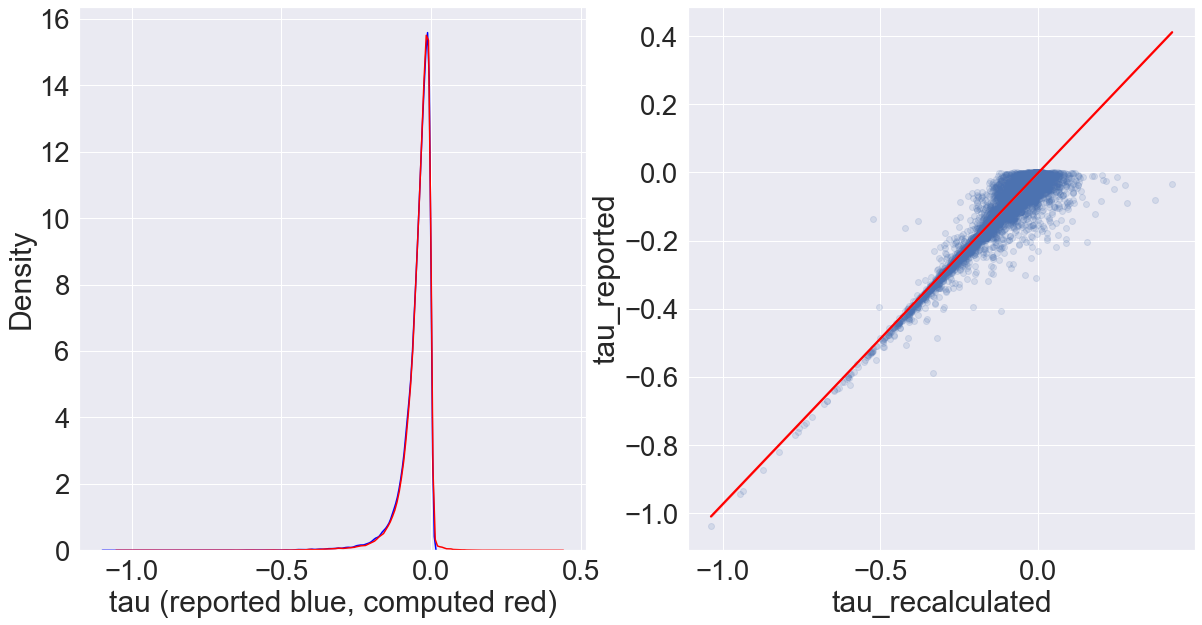

In [ ]:
sns.set(font_scale = 2.5)
fig, axs = plt.subplots(ncols=2, figsize=(20,10))
p = sns.kdeplot(kuzmin_fitness['adjusted_interaction_score_epsilon_or_tau'], ax=axs[0], color="blue")
p = sns.kdeplot(kuzmin_fitness['tau_recalculated'], ax=axs[0], color="red")
p.set(xlabel='tau (reported blue, computed red)')

p = sns.regplot(x=kuzmin_fitness['tau_recalculated'],
            y=kuzmin_fitness['adjusted_interaction_score_epsilon_or_tau'],
            scatter_kws={'alpha':0.15},
            line_kws={'color': 'red'},
            ax=axs[1])
p.set(xlabel='tau_recalculated', ylabel='tau_reported')
print(np.nanmean(kuzmin_fitness['adjusted_interaction_score_epsilon_or_tau']), np.nanmean(kuzmin_fitness['tau_recalculated']))
print(np.nanmedian(kuzmin_fitness['adjusted_interaction_score_epsilon_or_tau']), np.nanmedian(kuzmin_fitness['tau_recalculated']))
print(np.nanstd(kuzmin_fitness['adjusted_interaction_score_epsilon_or_tau']), np.nanstd(kuzmin_fitness['tau_recalculated']))

print("Pearson product-moment correlation", kuzmin_fitness[['tau_recalculated', 'adjusted_interaction_score_epsilon_or_tau']].corr(method="pearson"))

In [ ]:
print("tau_reported mean:", np.nanmean(kuzmin_fitness.adjusted_interaction_score_epsilon_or_tau))
print("tau_by_hand mean:", np.nanmean(kuzmin_fitness.tau_recalculated))
print("tau_by_hand_multiplicative: ", np.nanmean(kuzmin_fitness.tau_multiplicative))
print("tau_by_hand_additive:", np.nanmean(kuzmin_fitness.tau_additive))

print("\n")
print("tau_reported 5% quantile:", np.quantile(kuzmin_fitness.adjusted_interaction_score_epsilon_or_tau, 0.05))
print("tau_by_hand_multiplicative 5% quantile:", np.nanquantile(kuzmin_fitness.tau_multiplicative, 0.05))

print("\n")
tau_reported_sig_quant = np.mean( np.array(kuzmin_fitness.adjusted_interaction_score_epsilon_or_tau) < -0.08)
print("quantile of the significant value they used",  tau_reported_sig_quant )
print("confirming (should be -0.08):", np.quantile(kuzmin_fitness.adjusted_interaction_score_epsilon_or_tau, tau_reported_sig_quant))

tau_multiplicative_sig_val = np.nanquantile(kuzmin_fitness.tau_multiplicative, tau_reported_sig_quant)
print( "corresponding cutoff for multiplicative model: ", tau_multiplicative_sig_val)

tau_multiplicative_sig_val = 0.8848968660524983

tau_reported mean: -0.04801799652072747
tau_by_hand mean: -0.045181710183835974
tau_by_hand_multiplicative:  0.9550842644601841
tau_by_hand_additive: -0.03211205537039403


tau_reported 5% quantile: -0.13965499999999997
tau_by_hand_multiplicative 5% quantile: 0.7991762376974134


quantile of the significant value they used 0.1644697127679424
confirming (should be -0.08): -0.07999765787885108
corresponding cutoff for multiplicative model:  0.8848968660524983


91111
91111
Pearson product-moment correlation                     tau_multiplicative  tau_additive  tau_recalculated
tau_multiplicative            1.000000      0.700360          0.552849
tau_additive                  0.700360      1.000000          0.639553
tau_recalculated              0.552849      0.639553          1.000000


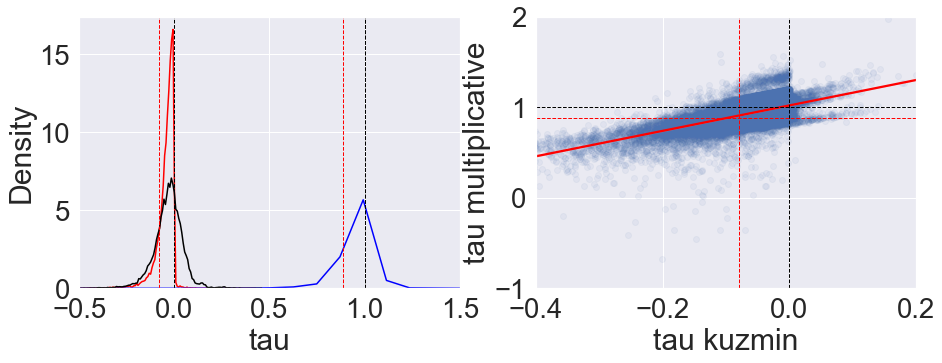

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
bw_param = 0.1
p = sns.kdeplot(kuzmin_fitness.tau_recalculated, ax=axs[0], color="red", bw_adjust=bw_param)
p = sns.kdeplot(kuzmin_fitness.tau_multiplicative, ax=axs[0], color="blue", bw_adjust=bw_param)
p = sns.kdeplot(kuzmin_fitness.tau_additive, ax=axs[0], color="black", bw_adjust=bw_param)
p.set(xlabel='tau')
axs[0].axvline(0, color="black", linewidth=1, linestyle="--")
axs[0].axvline(1, color="black", linewidth=1, linestyle="--")
axs[0].axvline(-0.08, color="red", linewidth=1, linestyle="--")
axs[0].axvline(0.8848968660524983, color="red", linewidth=1, linestyle="--")
axs[0].axvline(1, color="black", linewidth=1, linestyle="--")

axs[0].set_xlim(-0.5,1.5)

#p = sns.histplot(tau_by_hand, ax=axs[0])
#p.set(xlabel='tau_by_hand')
#axs[0].axvline(0.0, color="black", linewidth=1)

#sns.histplot(tau_by_hand_multiplicative, ax=axs[1])
#axs[1].set_xlim(0,2)
#axs[1].axvline(1.0, color="black", linewidth=1)
#axs[1].set(xlabel='tau_by_hand_multiplicative')

print(len(kuzmin_fitness.tau_multiplicative))
print(len(kuzmin_fitness.tau_recalculated))
sns.regplot(x=kuzmin_fitness.tau_recalculated,
            y=kuzmin_fitness.tau_multiplicative,
            scatter_kws={'alpha':0.06},
            line_kws={'color': 'red'},
            ax=axs[1])
axs[1].set(xlabel='tau kuzmin', ylabel='tau multiplicative')
axs[1].set_xlim(-0.4,0.2)
axs[1].set_ylim(-1,2)
axs[1].axvline(0, color="black", linewidth=1, linestyle="--")
axs[1].axvline(-0.080001, color="red", linewidth=1, linestyle="--")
axs[1].axhline(1, color="black", linewidth=1, linestyle="--")
axs[1].axhline(0.8848968660524983, color="red", linewidth=1, linestyle="--")


print("Pearson product-moment correlation", kuzmin_fitness[['tau_multiplicative', 'tau_additive', 'tau_recalculated']].corr(method="pearson"))


3196
3196
Pearson product-moment correlation                     tau_multiplicative  tau_additive  tau_recalculated
tau_multiplicative            1.000000       0.48899          0.523504
tau_additive                  0.488990       1.00000          0.863700
tau_recalculated              0.523504       0.86370          1.000000


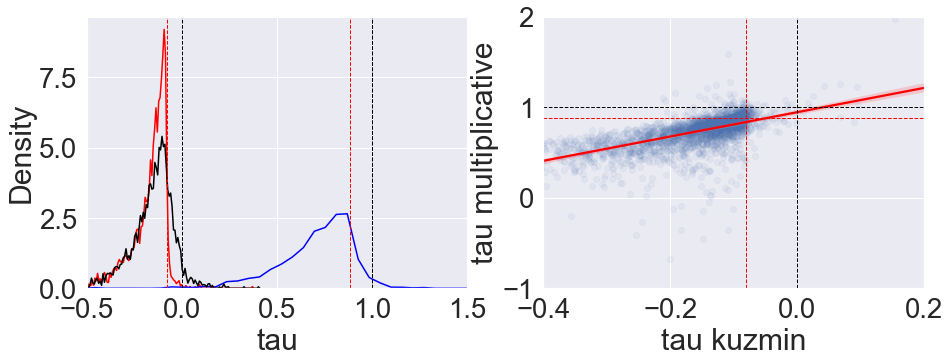

In [ ]:
df = kuzmin_fitness[(kuzmin_fitness.adjusted_interaction_score_epsilon_or_tau < -0.08) & (kuzmin_fitness.pval < 0.05)]

fig, axs = plt.subplots(ncols=2, figsize=(15,5))
bw_param = 0.1
p = sns.kdeplot(df.tau_recalculated, ax=axs[0], color="red", bw_adjust=bw_param)
p = sns.kdeplot(df.tau_multiplicative, ax=axs[0], color="blue", bw_adjust=bw_param)
p = sns.kdeplot(df.tau_additive, ax=axs[0], color="black", bw_adjust=bw_param)
p.set(xlabel='tau')
axs[0].axvline(0, color="black", linewidth=1, linestyle="--")
axs[0].axvline(1, color="black", linewidth=1, linestyle="--")
axs[0].axvline(-0.08, color="red", linewidth=1, linestyle="--")
axs[0].axvline(0.8848968660524983, color="red", linewidth=1, linestyle="--")
axs[0].axvline(1, color="black", linewidth=1, linestyle="--")

axs[0].set_xlim(-0.5,1.5)

#p = sns.histplot(tau_by_hand, ax=axs[0])
#p.set(xlabel='tau_by_hand')
#axs[0].axvline(0.0, color="black", linewidth=1)

#sns.histplot(tau_by_hand_multiplicative, ax=axs[1])
#axs[1].set_xlim(0,2)
#axs[1].axvline(1.0, color="black", linewidth=1)
#axs[1].set(xlabel='tau_by_hand_multiplicative')

print(len(df.tau_multiplicative))
print(len(df.tau_recalculated))
sns.regplot(x=df.tau_recalculated,
            y=df.tau_multiplicative,
            scatter_kws={'alpha':0.06},
            line_kws={'color': 'red'},
            ax=axs[1])
axs[1].set(xlabel='tau kuzmin', ylabel='tau multiplicative')
axs[1].set_xlim(-0.4,0.2)
axs[1].set_ylim(-1,2)
axs[1].axvline(0, color="black", linewidth=1, linestyle="--")
axs[1].axvline(-0.080001, color="red", linewidth=1, linestyle="--")
axs[1].axhline(1, color="black", linewidth=1, linestyle="--")
axs[1].axhline(0.8848968660524983, color="red", linewidth=1, linestyle="--")


print("Pearson product-moment correlation", df[['tau_multiplicative', 'tau_additive', 'tau_recalculated']].corr(method="pearson"))


In [ ]:
df1 = kuzmin_fitness[(kuzmin_fitness.adjusted_interaction_score_epsilon_or_tau < -0.08) 
                    & (kuzmin_fitness.pval < 0.05)]
print(len(df1))
df2 = kuzmin_fitness[(kuzmin_fitness.tau_multiplicative < 0.8848968660524983) & 
                    (kuzmin_fitness.pval < 0.05)]
print(len(df2))
print(len(df1.merge(df2, how="inner", on="three_alleles")))
df = kuzmin_fitness[(kuzmin_fitness.pval < 0.05)]
print(len(df))
print(2430/3196)

3196
3378
2430
7738
0.7603254067584481


In [ ]:
tmp = [DMF_epsilon[i] for i in DMF_epsilon]
#np.nanmean(kuzmin_fitness.array_single_mutant_fitness)
np.nanmean(np.nanmean(abs(np.array(tmp))))
#sns.histplot(kuzmin_fitness.array_single_mutant_fitness)



0.03640656077851042

In [ ]:
print(len(tau_by_hand_multiplicative))
print(np.sum([1 for i in tau_by_hand_multiplicative if i > 1]))
print(np.sum([1 for i in tau_by_hand_multiplicative if i < 1]))
print("###")
print(len(tau_by_hand))
print(np.sum([1 for i in tau_by_hand if i > 0]))
print(np.sum([1 for i in tau_by_hand if i < 0]))

62530
20222
39317
###
62530
1351
58188


In [ ]:
x = [True if i >= 1 else False for i in tau_by_hand_multiplicative ]
y = [True if i >= 0 else False for i in tau_by_hand ]
print( "both positive:", np.sum(np.logical_and(x,y)))

x = [True if i < 1 else False for i in tau_by_hand_multiplicative ]
y = [True if i >= 0 else False for i in tau_by_hand ]
print( "multiplicative negative, mixed positive:", np.sum(np.logical_and(x,y)))

x = [True if i >= 1 else False for i in tau_by_hand_multiplicative ]
y = [True if i < 0 else False for i in tau_by_hand ]
print( "multiplicative positive, mixed negative:", np.sum(np.logical_and(x,y)))

x = [True if i < 1 else False for i in tau_by_hand_multiplicative ]
y = [True if i < 0 else False for i in tau_by_hand ]
print( "multiplicative negative, mixed negative:", np.sum(np.logical_and(x,y)))

both positive: 1199
multiplicative negative, mixed positive: 711
multiplicative positive, mixed negative: 23988
multiplicative negative, mixed negative: 60213


3196
3196
Pearson product-moment correlation               tau_reported  tau_by_hand
tau_reported      1.000000     0.999854
tau_by_hand       0.999854     1.000000


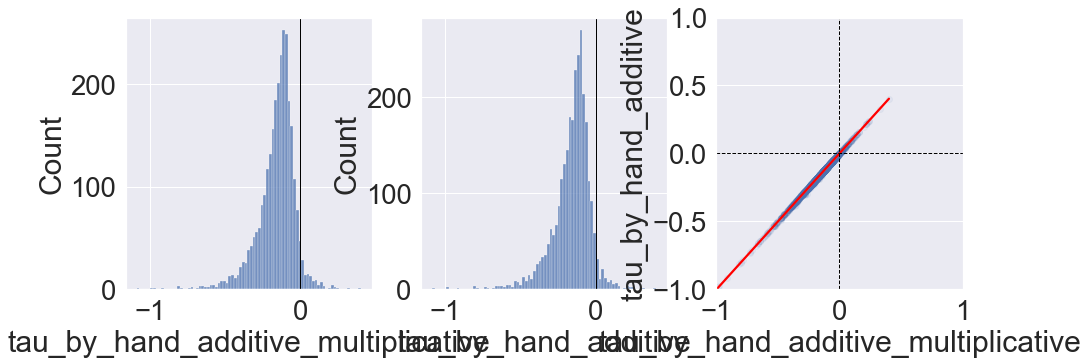

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

p = sns.histplot(tau_by_hand_additive_multiplicative, ax=axs[0])
p.set(xlabel='tau_by_hand_additive_multiplicative')
axs[0].axvline(0.0, color="black", linewidth=1)

sns.histplot(tau_by_hand_additive, ax=axs[1])
#axs[1].set_xlim(0,2)
axs[1].axvline(0.0, color="black", linewidth=1)
axs[1].set(xlabel='tau_by_hand_additive')

print(len(tau_by_hand_additive))
print(len(tau_by_hand_additive_multiplicative))

sns.regplot(x=tau_by_hand_additive_multiplicative,
            y=tau_by_hand_additive,
            scatter_kws={'alpha':0.06},
            line_kws={'color': 'red'},
            ax=axs[2])
axs[2].set(xlabel='tau_by_hand_additive_multiplicative', ylabel='tau_by_hand_additive')
axs[2].set_xlim(-1,1)
axs[2].set_ylim(-1,1)
axs[2].axvline(0, color="black", linewidth=1, linestyle="--")
#axs[2].axvline(-0.080001, color="red", linewidth=1, linestyle="--")
axs[2].axhline(0, color="black", linewidth=1, linestyle="--")



df = pd.DataFrame(list(zip(tau_by_hand_additive_multiplicative, tau_by_hand_additive)), columns = ["tau_reported","tau_by_hand"])
print("Pearson product-moment correlation", df.corr(method="pearson"))

In [ ]:
# HOW MANY SIGNIFICANT NEGATIVE TRIGENIC INTERACTIONS ARE NOT SIGNIFICANT ON MULTIPLICATIVE SCALE

print(len(tau_by_hand_multiplicative))
print( np.sum(np.array(tau_by_hand_multiplicative) >= tau_multiplicative_sig_val ) )
print( np.sum(np.array(tau_by_hand_multiplicative) < tau_multiplicative_sig_val ) )
print( np.mean(np.array(tau_by_hand_multiplicative) >= tau_multiplicative_sig_val ) )
print(382/(382+2430)) # this is a larger fraction because there are nan's


3196
382
2430
0.1195244055068836
0.13584637268847796


In [ ]:
print(len(tau_by_hand))
print(len(tau_by_hand_multiplicative))


x = [True if i < tau_multiplicative_sig_val else False for i in tau_by_hand_multiplicative ]
y = [True if i > -0.08 else False for i in tau_by_hand ]
false_neg = np.sum(np.logical_and(x,y))
print( "multiplicative significant, Kuzmin not:", false_neg)

print(false_neg/np.sum(np.array(tau_by_hand) < -0.08))
print(np.sum(np.array(tau_by_hand) < -0.08))

91111
91111
multiplicative significant, Kuzmin not: 5949
0.4573339483394834
13008


0.941995541544697
-0.02650663770494368


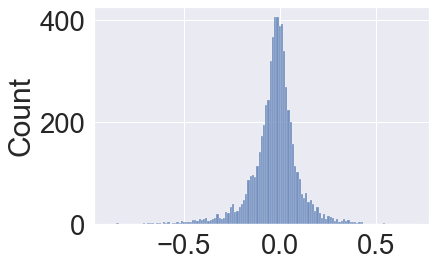

In [ ]:
sns.histplot(pairwise_epi_O_minus_E)
print(np.mean([SMF_costanzo_single[i] for i in SMF_costanzo_single]))
print(np.nanmean(pairwise_epi_O_minus_E))


[Text(0.5, 0, 'single mutant fitness scale'),
 Text(0, 0.5, 'pairwise epistasis')]

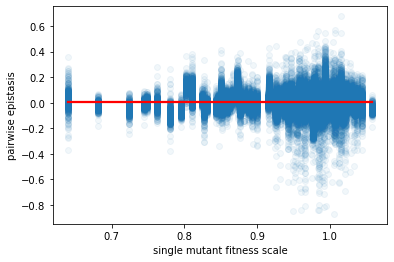

In [ ]:

epi = [i[0] for i in epi_with_scaled_single_mut_fit]
smf = [i[1] for i in epi_with_scaled_single_mut_fit]
#print(epi_with_scaled_single_mut_fit[0:3])
#print(epi[0:3])
#print(smf[0:3])

p = sns.regplot(x=smf,
            y=epi,
            scatter_kws={'alpha':0.06},
            line_kws={'color': 'red'})
p.set(xlabel='single mutant fitness scale', ylabel='pairwise epistasis')
#axs[2].set_xlim(-1,1)
#axs[2].set_ylim(-1,1)
#axs[2].axvline(0, color="black", linewidth=1, linestyle="--")
#axs[2].axvline(-0.080001, color="red", linewidth=1, linestyle="--")
#axs[2].axhline(0, color="black", linewidth=1, linestyle="--")



In [ ]:
sum=0
for i,t in enumerate(TMF):
    #if i < 10:
    test = [(t[0],t[1]) in epsilon_filtered,  (t[0],t[2]) in epsilon_filtered, (t[1],t[2]) in epsilon_filtered]
    if np.all( test ):
        sum += 1
print(sum, len(TMF))

NameError: name 'TMF' is not defined

In [ ]:
all_alleles = set()
# single (SMF), double (DMF), and triple (TMF) mutant fitness
SMF_costanzo = defaultdict(set)
for i,row in costanzo.iterrows():
    #if i < 100:
    SMF_costanzo[row['query_allele_name']].add(row['query_smf'])
    SMF_costanzo[row['array_allele_name']].add(row['array_smf'])


In [ ]:
x = defaultdict(int)
for s in SMF_costanzo:
     x[len(SMF_costanzo[s])] += 1
x

defaultdict(int,
            {1: 4441,
             3723: 1,
             3717: 1,
             3790: 1,
             3820: 1,
             3634: 1,
             2537: 1,
             3631: 1,
             3625: 1,
             3468: 1,
             3666: 3,
             3702: 2,
             3593: 1,
             3604: 2,
             4152: 3,
             3696: 2,
             3304: 1,
             3375: 1,
             3500: 1,
             2764: 1,
             3665: 1,
             3659: 1,
             3683: 1,
             3687: 2,
             3698: 2,
             3663: 1,
             3697: 1,
             4175: 1,
             3432: 1,
             3677: 2,
             3681: 2,
             3674: 2,
             3418: 1,
             3688: 1,
             3650: 1,
             4492: 1,
             3578: 1,
             3706: 2,
             3684: 1,
             3389: 1,
             3740: 2,
             3701: 2,
             3741: 2,
             3618: 1,
             41

In [ ]:
len(SMF_costanzo)

5647

In [ ]:
costanzo

,query_strain_id,query_allele_name,array_strain_id,array_allele_name,Arraytype_Temp,genetic_interaction_e,pval,query_smf,array_smf,dbl_mutant_fitness,dbl_mutant_fitness_std
0,YAL002W_sn273,vps8,YBL001C_dma94,ecm15,DMA30,0.1226,0.002185,0.7552,1.0112,0.8862,0.0327
1,YAL002W_sn273,vps8,YBL003C_dma93,hta2,DMA30,0.0269,0.242000,0.7552,1.0005,0.7825,0.0286
2,YAL002W_sn273,vps8,YBL005W_dma92,pdr3,DMA30,-0.0228,0.297900,0.7552,1.0248,0.7512,0.0343
3,YAL002W_sn273,vps8,YBL007C_dma91,sla1,DMA30,-0.0535,0.166300,0.7552,0.8230,0.5681,0.0525
4,YAL002W_sn273,vps8,YBL008W_dma90,hir1,DMA30,0.0532,0.071490,0.7552,0.9370,0.7608,0.0241
...,...,...,...,...,...,...,...,...,...,...,...
601685,YPR180W_tsq2481,aos1-5005,YPL228W_tsa420,cet1-15,TSA26,0.0024,0.485900,NaN,0.8044,0.8068,0.0393
601686,YPR180W_tsq2481,aos1-5005,YPL233W_tsa450,nsl1-5,TSA26,-0.0379,0.037030,NaN,0.8471,0.8092,0.0163
601687,YPR180W_tsq2481,aos1-5005,YPL233W_tsa452,nsl1-6,TSA26,-0.0228,0.274900,NaN,0.9983,0.9755,0.0300
601688,YPR180W_tsq2481,aos1-5005,YPL235W_tsa1202,rvb2-5001,TSA26,-0.0322,0.006225,NaN,0.9283,0.8961,0.0099


SyntaxError: invalid syntax (<ipython-input-128-5d317a638763>, line 2)